# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

## Name:Clarence Jiang
## UNI:yj2737

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

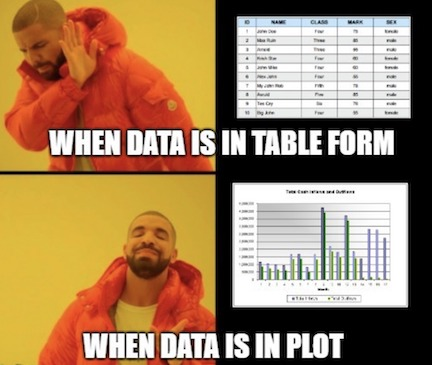


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



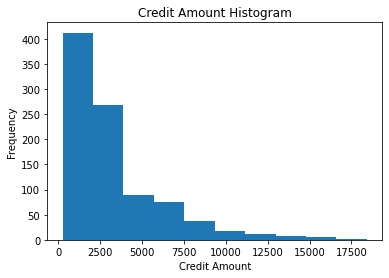

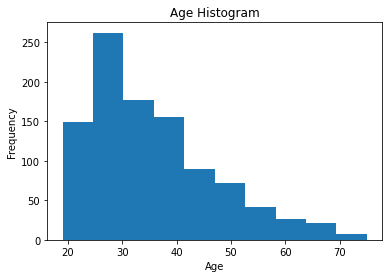

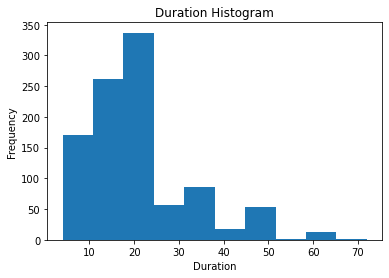

In [5]:
# YOUR CODE HERE
credit_ds = pd.read_csv("dataset_credit.csv")
credit_ds

plt.hist(credit_ds["credit_amount"])
plt.gca().set(title='Credit Amount Histogram', xlabel="Credit Amount", ylabel='Frequency')
plt.show()

plt.hist(credit_ds["age"])
plt.gca().set(title='Age Histogram', xlabel="Age", ylabel='Frequency')
plt.show()

plt.hist(credit_ds["duration"])
plt.gca().set(title='Duration Histogram', xlabel="Duration", ylabel='Frequency')
plt.show()



**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



[Text(0, 0.5, 'credit amount')]

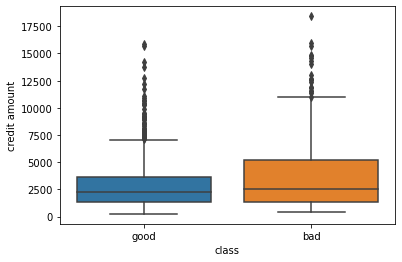

In [6]:
# Your code here
sns.boxplot(x = credit_ds["class"], y = credit_ds["credit_amount"]).set(ylabel = "credit amount")

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

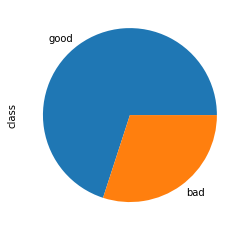

In [7]:
# Your code here
credit_ds["class"].value_counts().plot(kind="pie")
plt.show()

**Ans: Most of the credit amount are less than 7500. Most of the users in this dataset are young with ages from 20 to 40. Most of the duration are less than 25.Distributions of credit amount, age, and duration are all skewed to the right. The class "bad" has a slightly higher overall credit amount, while most of the classes are good.**

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

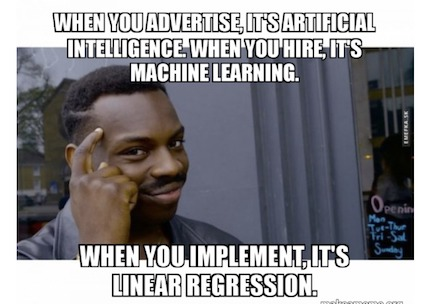

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [8]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

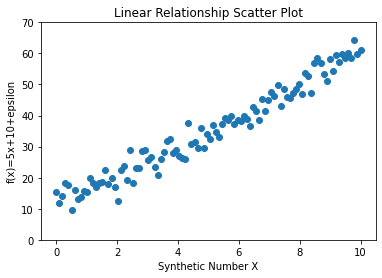

In [9]:
# Your code here
plt.scatter(x,y)
plt.gca().set(title='Linear Relationship Scatter Plot', xlabel="Synthetic Number X", ylabel='f(x)=5x+10+epsilon')
plt.ylim([0, 70])
plt.show()

**Ans: Yes, the features have linear relationship**

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [10]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [11]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

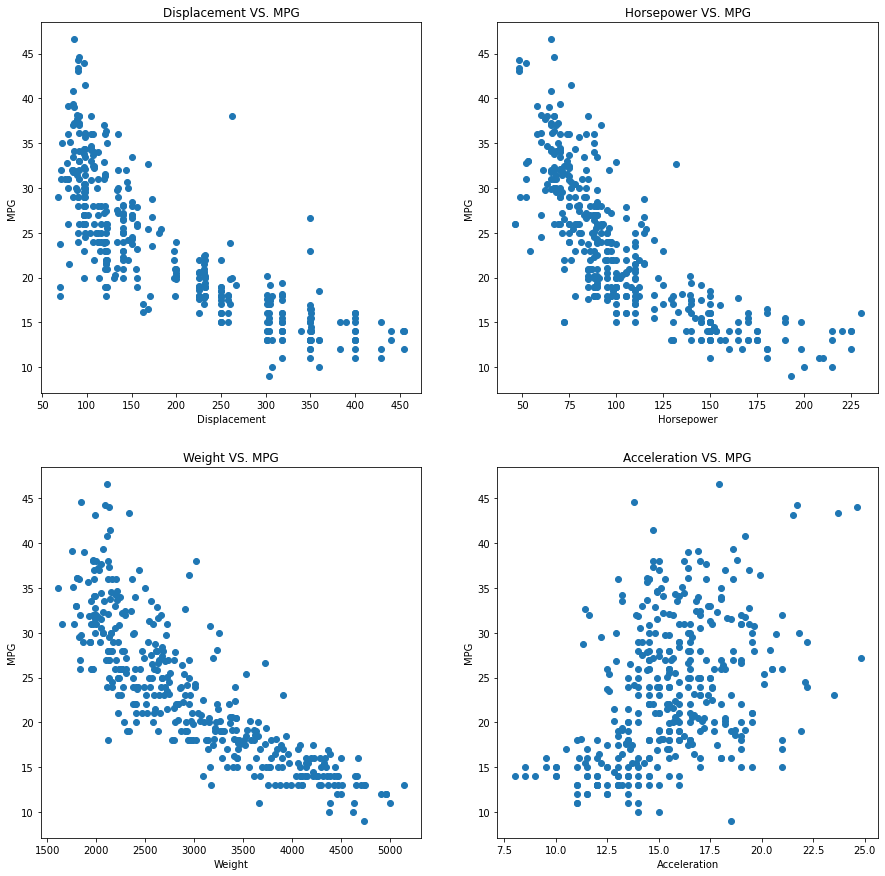

In [12]:
# Your code here
fig, axs = plt.subplots(2,2, figsize = (15,15))
axs[0,0].scatter(auto_mpg_X["displacement"], auto_mpg_y)
axs[0,0].set_title("Displacement VS. MPG")
axs[0,0].set_xlabel("Displacement")
axs[0,0].set_ylabel("MPG")

axs[0,1].scatter(auto_mpg_X["horsepower"], auto_mpg_y)
axs[0,1].set_title("Horsepower VS. MPG")
axs[0,1].set_xlabel("Horsepower")
axs[0,1].set_ylabel("MPG")

axs[1,0].scatter(auto_mpg_X["weight"], auto_mpg_y)
axs[1,0].set_title("Weight VS. MPG")
axs[1,0].set_xlabel("Weight")
axs[1,0].set_ylabel("MPG")

axs[1,1].scatter(auto_mpg_X["acceleration"], auto_mpg_y)
axs[1,1].set_title("Acceleration VS. MPG")
axs[1,1].set_xlabel("Acceleration")
axs[1,1].set_ylabel("MPG")

plt.show()

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

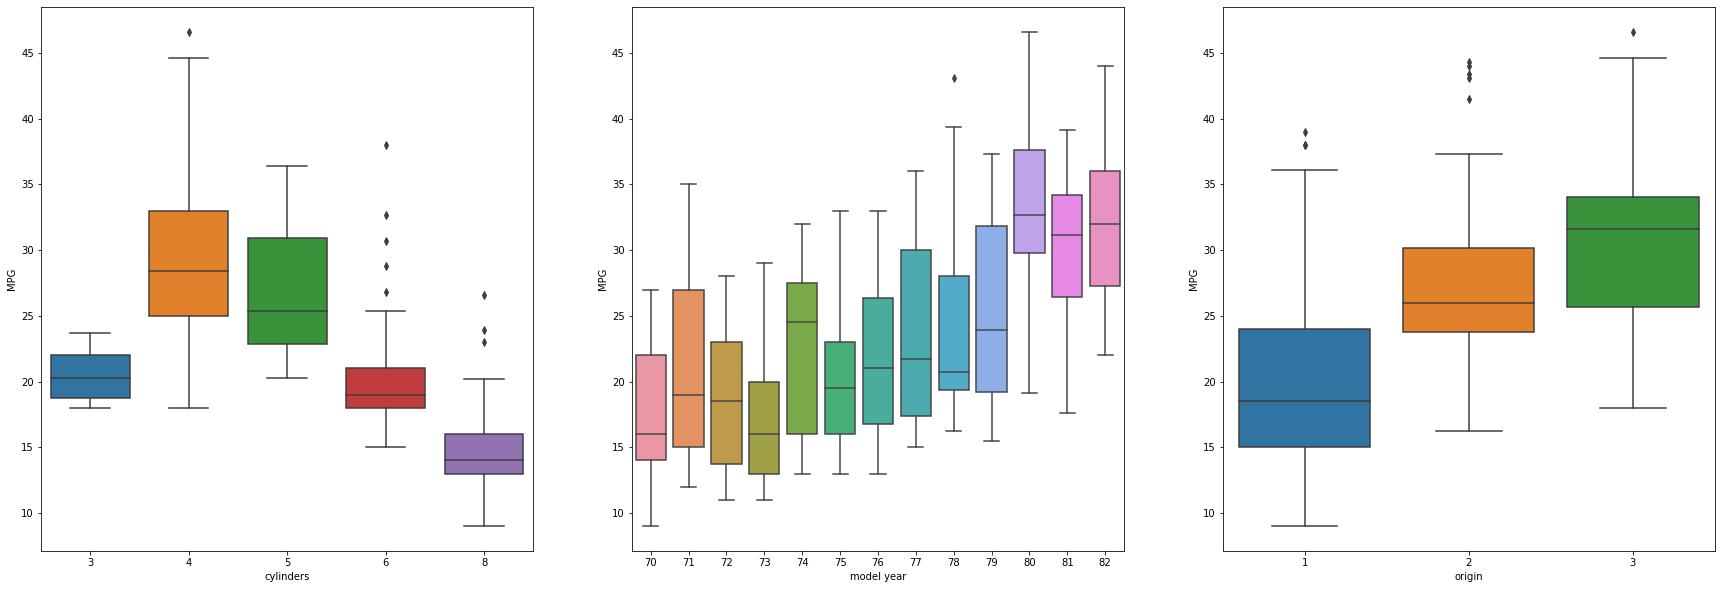

In [13]:
# Your code here
fig, axs = plt.subplots(1,3, figsize = (30,10))

sns.boxplot(x = auto_mpg_X["cylinders"], y = auto_mpg_y, ax = axs[0]).set(ylabel = "MPG", xlabel = "cylinders")
sns.boxplot(x = auto_mpg_X["model year"], y = auto_mpg_y, ax = axs[1]).set(ylabel = "MPG", xlabel = "model year")
sns.boxplot(x = auto_mpg_X["origin"], y = auto_mpg_y, ax = axs[2]).set(ylabel = "MPG", xlabel = "origin")

plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

**Ans:**
I do not think linear regression is a good model for this problem, since it first contains 3 categorical attributes that need further processing. Second, some of the features more seem to form a logistic relationship shape like displacement, weight, and horsepower.


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [14]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [15]:
# Your code here

# autompg_X should be already in the form of feature matrix 

# 1: encode with any method for categorical data 
enc1 = OrdinalEncoder(categories = [["3", "4", "5", "6", "8"]])
auto_mpg_X["cylinders"] = enc1.fit_transform(auto_mpg_X["cylinders"].to_numpy().reshape(-1,1))
enc2 = OrdinalEncoder(categories = [["70", "71", "72", "73", "73", "74", "75", "76", "77", "78", "79", "80", "81", "82"]])
auto_mpg_X["model year"] = enc2.fit_transform(auto_mpg_X["model year"].to_numpy().reshape(-1,1))
enc3 = OrdinalEncoder(categories = [["1", "2", "3"]])
auto_mpg_X["origin"] = enc3.fit_transform(auto_mpg_X["origin"].to_numpy().reshape(-1,1))

In [16]:
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

In [17]:
# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

In [18]:
# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

In [19]:
print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.65558139  0.39492947  0.1100916   0.8241919   0.28262047
  -0.44683862 -0.77559006]
 [ 1.         -0.88618791 -0.97348359 -0.87531843 -1.20346504 -0.54674887
   0.0498846   0.43433043]
 [ 1.          1.42646604  1.33761402  1.37704734  1.02260224 -1.159761
  -0.94356183 -0.77559006]
 [ 1.         -0.88618791 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.29169263 -0.77559006]
 [ 1.         -0.88618791 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.04333102  0.43433043]] 

 135    18.0
197    29.0
89     15.0
338    27.2
325    44.3
Name: mpg, dtype: float64


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [20]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        first_part = np.dot(np.transpose(X), X) + \
                     self.alpha * np.identity(len(X[0]))
        second_part = np.linalg.inv(first_part)
        self.w = np.dot(np.dot(second_part, np.transpose(X)), y) 
       
        
            
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.dot(X, self.w)
        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [21]:
# Your code here
lr = LinearRegression(alpha = 0)
lr.train(X_train, y_train)
y_lr_predicted = lr.predict(X_test)
print("Predicted Value, first 3, and then last 3")
print(y_lr_predicted[0:3,])
print(y_lr_predicted[-3:,])
print()
print("Acutal Label, first 3, and then last 3")
print(y_test[0:3,])
print(y_test[-3:,])

Predicted Value, first 3, and then last 3
[23.29684501 53.01355017 11.41016295]
[22.30628817 26.76379395 14.38183346]

Acutal Label, first 3, and then last 3
[23.26858868 56.97068215 13.94631496]
[28.93047599 20.72427726 13.73074749]


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

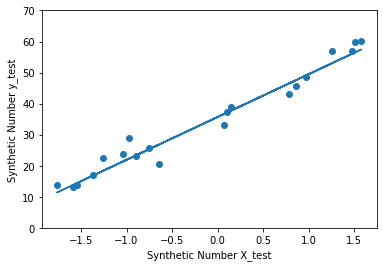

In [22]:
# Your code here
plt.scatter(X_test[:,1],y_test)
plt.gca().set(xlabel="Synthetic Number X_test", ylabel='Synthetic Number y_test')
plt.ylim([0, 70])
plt.plot(X_test[:,1],y_lr_predicted)
plt.show()


**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [23]:
# Your code here
from sklearn.metrics import mean_squared_error
lr2 = LinearRegression(alpha = 0)
lr2.train(auto_mpg_X_train, auto_mpg_y_train)
auto_mpg_y_lr_train_predicted = lr2.predict(auto_mpg_X_train)
auto_mpg_y_lr_val_predicted = lr2.predict(auto_mpg_X_val)
auto_mpg_y_lr_test_predicted = lr2.predict(auto_mpg_X_test)

print(f"MSE of train:  {mean_squared_error(auto_mpg_y_lr_train_predicted, auto_mpg_y_train)}")
print(f"MSE of validation:  {mean_squared_error(auto_mpg_y_lr_val_predicted, auto_mpg_y_val)}")
print(f"MSE of test:  {mean_squared_error(auto_mpg_y_lr_test_predicted, auto_mpg_y_test)}")
print()
print("Predicted Value of the test dataset, first 3, and then last 3")
print(auto_mpg_y_lr_test_predicted[0:3,])
print(auto_mpg_y_lr_test_predicted[-3:,])
print()
print("Acutal Value of the test dataset, first 3, and then last 3")
print(list(auto_mpg_y_test[0:3,]))
print(list(auto_mpg_y_test[-3:,]))

MSE of train:  10.427866256473306
MSE of validation:  13.047130434460072
MSE of test:  10.652456801363204

Predicted Value of the test dataset, first 3, and then last 3
[26.6261513  26.17485404 10.1830302 ]
[26.71695638 21.4425046  32.2906656 ]

Acutal Value of the test dataset, first 3, and then last 3
[28.0, 22.3, 12.0]
[26.0, 19.2, 31.5]


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [24]:
# Your code here
from statistics import mean
auto_mpg_y_lr_train_predicted_base = np.full(len(auto_mpg_y_train), mean(auto_mpg_y_train))
auto_mpg_y_lr_val_predicted_base = np.full(len(auto_mpg_y_val), mean(auto_mpg_y_train))
auto_mpg_y_lr_test_predicted_base = np.full(len(auto_mpg_y_test), mean(auto_mpg_y_train))
print(f"MSE of train with baseline:  {mean_squared_error(auto_mpg_y_lr_train_predicted_base, auto_mpg_y_train)}")
print(f"MSE of validation with baseline:  {mean_squared_error(auto_mpg_y_lr_val_predicted_base, auto_mpg_y_val)}")
print(f"MSE of test with baseline:  {mean_squared_error(auto_mpg_y_lr_test_predicted_base, auto_mpg_y_test)}")

MSE of train with baseline:  60.56461465410184
MSE of validation with baseline:  60.47988929483249
MSE of test with baseline:  62.4616051879408


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

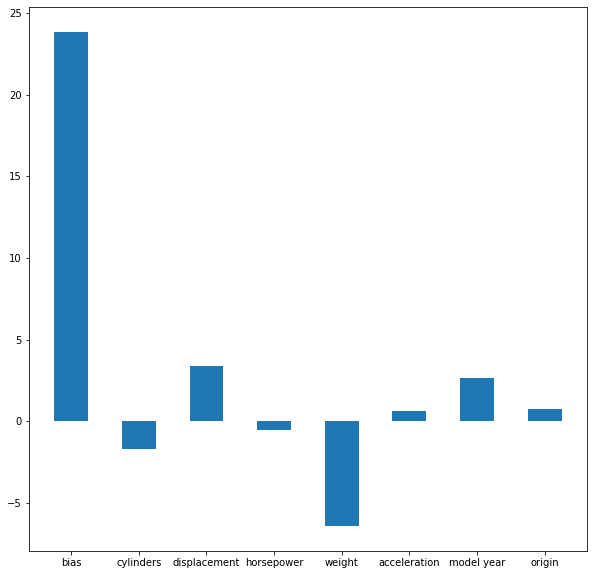

In [25]:
# Your code here
column_name = list(auto_mpg_df.columns)
column_name[0] = "bias"
plt.figure(figsize=(10,10))
plt.bar(column_name, lr2.w, width = 0.5)
plt.show()

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

**Ans: Displacement and model year** 

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

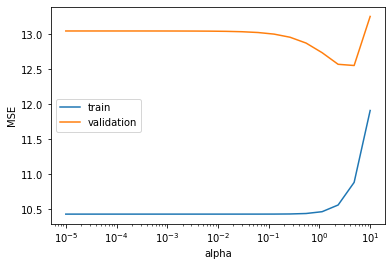

In [26]:
# Your code here
alphas = np.logspace(-5,1,20)
train_alpha_result_mse = []
val_alpha_result_mse = []
for val in alphas:
    lr_alpha = LinearRegression(alpha = val)
    lr_alpha.train(auto_mpg_X_train, auto_mpg_y_train)
    auto_mpg_y_lr_train_alpha = lr_alpha.predict(auto_mpg_X_train)
    auto_mpg_y_lr_val_alpha = lr_alpha.predict(auto_mpg_X_val)
    train_alpha_result_mse.append(mean_squared_error(auto_mpg_y_lr_train_alpha, auto_mpg_y_train))
    val_alpha_result_mse.append(mean_squared_error(auto_mpg_y_lr_val_alpha, auto_mpg_y_val))

plt.plot(alphas, train_alpha_result_mse, label="train")
plt.plot(alphas, val_alpha_result_mse, label="validation")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()
    
    

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

**Ans:** 
When decreasing model complexity, both MSE tends to increase at the end, indicating that a relatively less complex model is more likely to lead greater error.


## Part 2: Logistic Regression

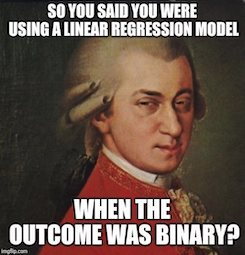






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


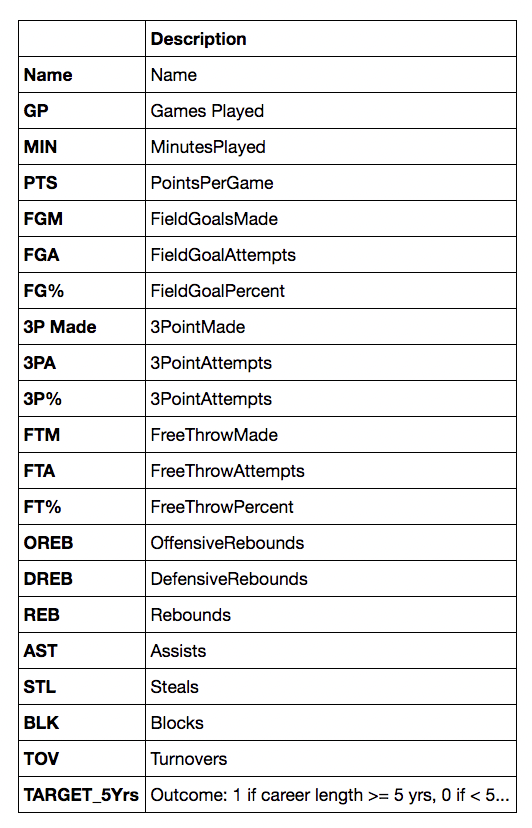

In [27]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

(1340, 21)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [28]:
# Your code here 
# There is only one column with 11 missing values
row_length = nba_reg.shape[0]
print(f"The row length of this data is {row_length}")
print(f"The total missing value is {nba_reg.isnull().sum().sum()}")
print("Yes, missing values could be removed as row length >> missing count")

The row length of this data is 1340
The total missing value is 11
Yes, missing values could be removed as row length >> missing count


In [29]:
# Your Code here
nba_reg_new = nba_reg.dropna()

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [30]:
# Your code here
nba_reg_new["TARGET_5Yrs"].value_counts()/nba_reg_new.shape[0]

1.0    0.62152
0.0    0.37848
Name: TARGET_5Yrs, dtype: float64

**ANS: No, it is not balanced as players with "more than 5 years" is dominant.**



In [31]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1329, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

In [32]:
# Your code here
corr_df = nba_reg_new.corr()
corr_df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693,0.397783
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431,0.316031
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272,0.314632
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343,0.316393
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952,0.290684
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429,0.235587
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015,0.035025
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496,0.016151
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762,0.295546


In [33]:
# print all highly correlated features pair
for col in corr_df.columns:
    col_series = corr_df[(corr_df[col]>=0.9) & (corr_df[col]<1)][col]
    if not col_series.empty:
        print(f"{col}:\n{col_series}\n")
        
"""
Only keep Min among (Min, PTS, FGM, FGA), keep 3P Made among (3P Made and 3PA), 
keep FTM among (FTM and FTA), keep REB and drop OREB AND DREB
"""
nba_reg_new_dropped = nba_reg_new.drop(["PTS", "FGM", "FGA", "3PA", "FTA", "OREB", "DREB"], axis = 1)


MIN:
PTS    0.911746
FGM    0.902864
FGA    0.910194
Name: MIN, dtype: float64

PTS:
MIN    0.911746
FGM    0.990874
FGA    0.979676
Name: PTS, dtype: float64

FGM:
MIN    0.902864
PTS    0.990874
FGA    0.980117
Name: FGM, dtype: float64

FGA:
MIN    0.910194
PTS    0.979676
FGM    0.980117
Name: FGA, dtype: float64

3P Made:
3PA    0.982579
Name: 3P Made, dtype: float64

3PA:
3P Made    0.982579
Name: 3PA, dtype: float64

FTM:
FTA    0.980626
Name: FTM, dtype: float64

FTA:
FTM    0.980626
Name: FTA, dtype: float64

OREB:
REB    0.932874
Name: OREB, dtype: float64

DREB:
REB    0.978199
Name: DREB, dtype: float64

REB:
OREB    0.932874
DREB    0.978199
Name: REB, dtype: float64



**ANS: It is necessary to drop highly correlated features, since it is not adding any extra information but adding model complexity.**

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [34]:
# Split data into features and labels

nba_new_X = nba_reg_new_dropped.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_Y = nba_reg_new_dropped['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'MIN', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'REB', 'AST', 'STL',
       'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [35]:
# Your code here
# Convert label to numpy array 
nba_new_Y = nba_new_Y.to_numpy()

In [36]:
nba_new_Y = nba_new_Y.reshape(-1,1)

In [37]:
# Split 
nba_X_dev, nba_X_test, nba_y_dev, nba_y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=0)
nba_X_train, nba_X_val, nba_y_train, nba_y_val = train_test_split(nba_X_dev, nba_y_dev, test_size=0.25, random_state=0)

In [38]:
# Standardize the columns, 
scaler2 = StandardScaler()
nba_X_train = scaler2.fit_transform(nba_X_train)   # Fit and transform scalar on X_train
nba_X_val = scaler2.transform(nba_X_val)           # Transform X_val
nba_X_test = scaler2.transform(nba_X_test)         # Transform X_test

In [39]:
# Add a column of ones
nba_X_train = np.hstack([np.ones((nba_X_train.shape[0], 1)), nba_X_train])
nba_X_val = np.hstack([np.ones((nba_X_val.shape[0], 1)), nba_X_val])
nba_X_test = np.hstack([np.ones((nba_X_test.shape[0], 1)), nba_X_test])

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [40]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

In [41]:
# Your code here 
# Part A
log_r = LogisticRegression(alpha = 0, t = 100, eta = 1e-3)
loss1 = log_r.train(nba_X_train, nba_y_train)

In [42]:
"""
This structure is a list composed of 100 array, each array has a list of list
which should be converted back to 1d. 
"""
for i in range(len(loss1)):
    loss1[i] = loss1[i][0]

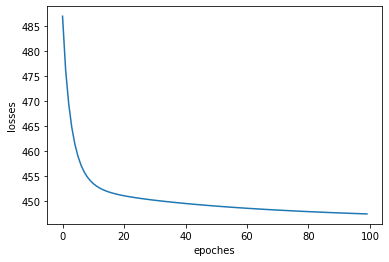

In [43]:
plt.plot(range(len(loss1)), loss1)
plt.xlabel("epoches")
plt.ylabel("losses")
plt.show()


In [44]:
# Part B, alpha between (0,1), eta between(0, 0.001) and t between (0, 100)
alpha_range = np.linspace(0, 1, num=20)
eta_range = np.linspace(0, 0.001, num=20)
t_range = np.linspace(0, 100, num=20)
# Map to force integer form
t_range = list(map(int, t_range))
accuracy_list = []

for i in range(20):
    log_r_hyp = LogisticRegression(alpha = alpha_range[i], t = t_range[i], eta = eta_range[i])
    log_r_hyp.train(nba_X_train, nba_y_train)
    nba_y_val_predicted = log_r_hyp.predict(nba_X_val)
    accuracy_list.append(accuracy_score(nba_y_val_predicted, nba_y_val))

max_accuracy = max(accuracy_list)
print(f"The max of validation accuray is {max(accuracy_list)}\nThe set of parameters are alpha = {alpha_range[accuracy_list.index(max_accuracy)]}, t: {t_range[accuracy_list.index(max_accuracy)]}, eta: {eta_range[accuracy_list.index(max_accuracy)]}")


The max of validation accuray is 0.7180451127819549
The set of parameters are alpha = 0.894736842105263, t: 89, eta: 0.0008947368421052632


In [45]:
# Part C, as for the logistic regression trained with the parameter set (alpha=0, t=100, eta=1e-3)
print(f"For the set (alpha=0, t=100, eta=1e-3), the accuray of test dataset is about {accuracy_score(log_r.predict(nba_X_test), nba_y_test)}")
# For the hyperparemeter that I trained 
max_index = accuracy_list.index(max_accuracy)
log_r_max = LogisticRegression(alpha = alpha_range[max_index], t = t_range[max_index], eta = eta_range[max_index])
log_r_max.train(nba_X_train, nba_y_train)
print(f"For the hyperparameters I found, the accuray of test dataset is about {accuracy_score(log_r_max.predict(nba_X_test), nba_y_test)}")

For the set (alpha=0, t=100, eta=1e-3), the accuray of test dataset is about 0.7406015037593985
For the hyperparameters I found, the accuray of test dataset is about 0.7406015037593985


In [46]:
print(log_r_max.predict(nba_X_test) == log_r.predict(nba_X_test))

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

**ANS:Okay, I am sure that it is only a coincidence that all my predicted labels are the same as the results from the other given model, and I think the reason is my optimal parameter set is relatively close to the one given.**

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

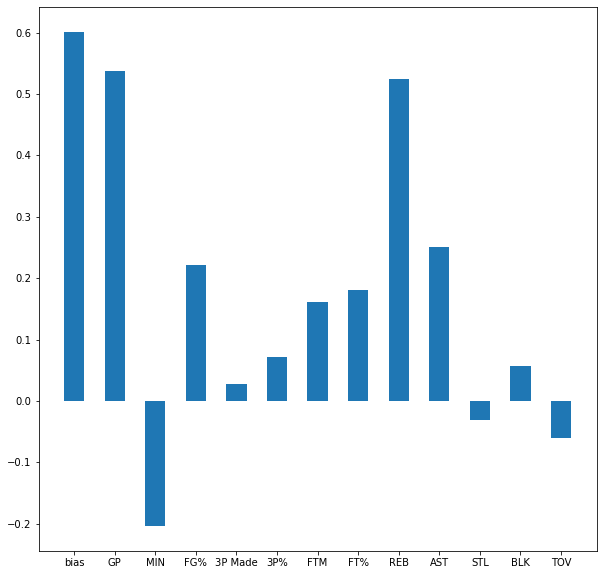

In [47]:
"""
I will do the analysis on my trained model instead of the one given with 
the parameter set (alpha = 0, t = 100, eta = 1e-3). Unfortunately, the 
implemented logistic regression class has a mistake, and I need to turn 
the 2d form into 1d
"""
log_weight = [element[0] for element in log_r_max.w]
log_column_name = list(nba_new_X.columns)
log_column_name = ["bias"] + log_column_name

plt.figure(figsize=(10,10))
plt.bar(log_column_name, log_weight, width = 0.5)
plt.show()

**ANS: Interpretation: Seems that GP, REB contribute most, while FG% and AST also have decent contributions**


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [48]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [50]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [51]:
# Your code here
primal_SVM = LinearSVC(dual=False)
primal_SVM.fit(cancer_X_train, cancer_y_train)
primal_cancer_train_score = primal_SVM.score(cancer_X_train, cancer_y_train)
primal_cancer_val_score = primal_SVM.score(cancer_X_val, cancer_y_val)
primal_cancer_test_score = primal_SVM.score(cancer_X_test, cancer_y_test)
print(f"The train score is {primal_cancer_train_score}.")
print(f"The validation score is {primal_cancer_val_score}.")
print(f"The test score is {primal_cancer_test_score}.")

The train score is 0.9912023460410557.
The validation score is 0.9298245614035088.
The test score is 0.9473684210526315.


C:\Users\Clare\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [52]:
# Your code here
dual_SVM = SVC(kernel = "linear")
dual_SVM.fit(cancer_X_train, cancer_y_train)
dual_cancer_train_score = dual_SVM.score(cancer_X_train, cancer_y_train)
dual_cancer_val_score = dual_SVM.score(cancer_X_val, cancer_y_val)
dual_cancer_test_score = dual_SVM.score(cancer_X_test, cancer_y_test)
print(f"The train score is {dual_cancer_train_score}.")
print(f"The validation score is {dual_cancer_val_score}.")
print(f"The test score is {dual_cancer_test_score}.")

The train score is 0.9912023460410557.
The validation score is 0.9473684210526315.
The test score is 0.9649122807017544.


C:\Users\Clare\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
